# Wigner’s surmise

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
class RMT1():
    #RMT
    def __init__(self, n):
        self.N = n
        self.rmt = np.zeros((self.N , self.N))
    
    def URMT(self, x1, x2):
        for i in range(len(self.rmt)):
            for j in range(len(self.rmt[i])):
                self.rmt[i][j] = np.random.uniform(x1, x2)
                self.rmt[j][i] = self.rmt[i][j]
    
    #GOE (Gaussian Orthogonal Ensemble)
    def GRMT0(self, mu, sigma):
        for i in range(len(self.rmt)):
            for j in range(len(self.rmt[i])):
                self.rmt[i][j] = np.random.normal(mu, sigma)
        rmatT = np.transpose(self.rmt)
        self.rmt = (self.rmt + rmatT)/2
   
    def GRMT1(self, mu, sigma):
        for i in range(len(self.rmt)):
            for j in range(i, len(self.rmt[i])):
                self.rmt[i][j] = np.random.normal(mu, sigma)
                self.rmt[j][i] = self.rmt[i][j]

    def GRMT2(self, mud, sigmad, mu, sigma):
        for i in range(len(self.rmt)):
            for j in range(i, len(self.rmt[i])):
                self.rmt[i][j] = np.random.normal(mu, sigma)
                self.rmt[j][i] = self.rmt[i][j]
            self.rmt[i][i] = np.random.normal(mud, sigmad)
    
    def GRMT3(self, mud, sigmad, mu, sigma):
        self.rmt[0][1] = np.random.normal(mu, sigma)
        self.rmt[1][0] = self.rmt[0][1]
        for i in range(len(self.rmt)):
            self.rmt[i][i] = np.random.normal(mud, sigmad)


In [3]:
myRMT = RMT1(2)
myRMT.GRMT3(0, 1, 0, np.sqrt(0.5))
e = LA.eigvals(myRMT.rmt)
print(myRMT.rmt)

[[-0.6262817  -1.26421225]
 [-1.26421225 -0.40652256]]


In [4]:
np.sort(e)

array([-1.78538051,  0.75257625])

$ s = \lambda_{2} - \lambda_{1} $ and $\lambda_{2} > \lambda_{1}$
<br>
$\rho(s) = ?$

In [5]:
myRMT = RMT1(2)
EN = 20000
s = []
for i in range(EN):
    myRMT.GRMT3(0, 1, 0, np.sqrt(0.500))
    e = np.sort(LA.eigvals(myRMT.rmt))
    s.append(e[1]-e[0])
s = np.array(s)
ms = np.mean(s)
print(ms)

1.766171850615363


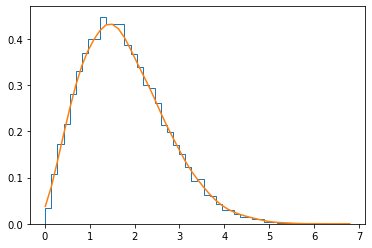

In [6]:
n, x, _ = plt.hist(s, bins=50, histtype=u'step', density=True)
density = stats.gaussian_kde(s)
density.covariance_factor = lambda : 0.2
density._compute_covariance()
plt.plot(x, density(x))
plt.show()

$\rho(s) = \frac{s}{2} e^{-s^2/4}$

In [7]:
def ws(s):
    return (s/2)*np.exp(-(s**2)/4)

ts = np.arange(0, 6, 0.01)
tps = []
for i in range(len(ts)):
    tps.append(ws(ts[i]))

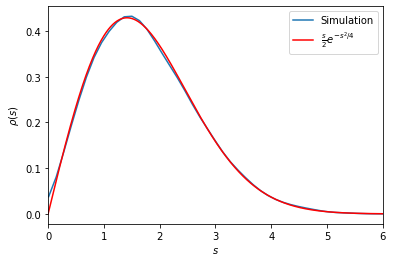

In [11]:
density = stats.gaussian_kde(s)
density.covariance_factor = lambda : 0.2
density._compute_covariance()
plt.plot(x, density(x), label='Simulation')
plt.plot(ts, tps, color='red', label=r'$\frac{s}{2} e^{-s^2/4}$')
plt.legend()
plt.xlim(0, 6)
plt.xlabel('$s$')
plt.ylabel(r'$\rho(s)$')
plt.show()